In [2]:
# Importando bibliotecas

import pandas as pd
import numpy as np

In [3]:
# Carregando arquivos

url_sellers = 'https://raw.githubusercontent.com/OtavioSotnas/Trabalhinho-Ada-PT2/main/base%20de%20dados/olist_sellers_dataset.csv'
url_order_items = 'https://raw.githubusercontent.com/OtavioSotnas/Trabalhinho-Ada-PT2/main/base%20de%20dados/olist_order_items_dataset.csv'

df_sellers = pd.read_csv(url_sellers)
df_order_items = pd.read_csv(url_order_items)

# 1. Order Items

## 1.1 Análise dos dados

In [18]:
df_order_items = pd.read_csv(url_order_items)

In [5]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
print(f'{df_order_items.shape}')

(112650, 7)


In [11]:
df_order_items.info() # A base de dados é constituida por colunas de identificação do pedido, produto, vendedor e data limite de entrega (dtype=object)
                      # e também por colunas de valor e valor do frete dos produtos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [10]:
df_order_items.isnull().sum() # Esses dados não contem valores nulos

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [40]:
df_order_items['product_id'].value_counts(True).head(10) # Produtos que mais são vendidos

product_id
aca2eb7d00ea1a7b8ebd4e68314663af    0.004678
99a4788cb24856965c36a24e339b6058    0.004332
422879e10f46682990de24d770e7f83d    0.004296
389d119b48cf3043d311335e499d9c6b    0.003480
368c6c730842d78016ad823897a372db    0.003444
53759a2ecddad2bb87a079a1f1519f73    0.003311
d1c427060a0f73f6b889a5c7c61f2ac4    0.003045
53b36df67ebb7c41585e8d54d6772e08    0.002867
154e7e31ebfa092203795c972e5804a6    0.002494
3dd2a17168ec895c781a9191c1e95ad7    0.002432
Name: proportion, dtype: float64

In [32]:
df_order_items['total_order_value'] = df_order_items['price'] + df_order_items['freight_value'] # Acrescentanto coluna valor total

In [33]:
df_order_items['shipping_year'] = df_order_items['shipping_limit_date'].str[0:4] # Acrescentando coluna do ano de envio

In [41]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_order_value,shipping_year
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19,2017
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83,2017
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87,2018
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78,2018
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04,2017


In [34]:
df_order_items.describe() # Dados estatísticos das colunas numéricas

,order_item_id,price,freight_value,total_order_value
count,112650.000000,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320,140.644059
std,0.705124,183.633928,15.806405,190.724394
min,1.000000,0.850000,0.000000,6.080000
25%,1.000000,39.900000,13.080000,55.220000
50%,1.000000,74.990000,16.260000,92.320000
75%,1.000000,134.900000,21.150000,157.937500
max,21.000000,6735.000000,409.680000,6929.310000


## 1.2 Gráficos

In [42]:
vendedor_mais_vendeu = df_order_items.groupby('seller_id')['price'].sum().sort_values().tail(20)

<Axes: title={'center': 'Vendedores que mais faturou'}, xlabel='Vendedor', ylabel='Valor'>

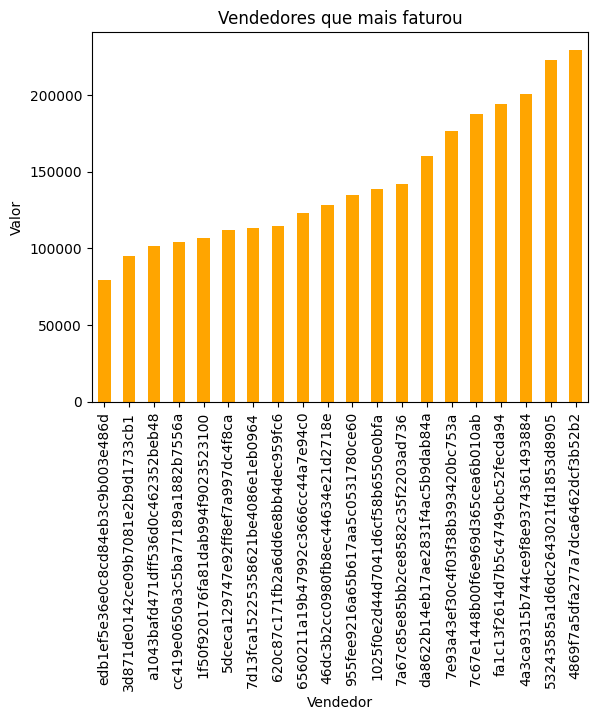

In [43]:
vendedor_mais_vendeu.plot(kind='bar', xlabel='Vendedor',ylabel='Valor', title='Vendedores que mais faturou', color='orange')

# 2. Sellers

## 2.1 Análise dos dados

In [44]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [45]:
df_sellers.shape

(3095, 4)

In [46]:
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [48]:
df_sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [55]:
df_sellers['seller_city'] = df_sellers['seller_city'].str.title()
df_sellers['city_state'] = df_sellers['seller_city'] + ' - ' + df_sellers['seller_state']

In [56]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,city_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Campinas,SP,Campinas - SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,Mogi Guacu,SP,Mogi Guacu - SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Rio De Janeiro,RJ,Rio De Janeiro - RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Sao Paulo,SP,Sao Paulo - SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Braganca Paulista,SP,Braganca Paulista - SP


In [57]:
df_sellers['seller_city'].value_counts(True).head(10)

seller_city
Sao Paulo         0.224233
Curitiba          0.041034
Rio De Janeiro    0.031018
Belo Horizonte    0.021971
Ribeirao Preto    0.016801
Guarulhos         0.016155
Ibitinga          0.015832
Santo Andre       0.014540
Campinas          0.013247
Maringa           0.012924
Name: proportion, dtype: float64

In [58]:
df_sellers['seller_state'].value_counts(True).head(10)

seller_state
SP    0.597415
PR    0.112763
MG    0.078837
SC    0.061389
RJ    0.055250
RS    0.041680
GO    0.012924
DF    0.009693
ES    0.007431
BA    0.006139
Name: proportion, dtype: float64

## 2.2 Gráficos

<Axes: title={'center': '10 maiores estados onde moram os vendedores habitam'}, xlabel='Porcentagem', ylabel='Estados'>

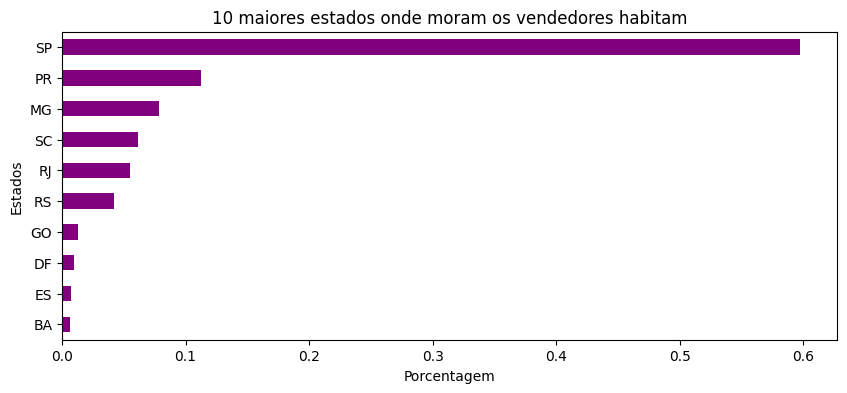

In [67]:
df_sellers.value_counts('seller_state', ascending=True, normalize=True).tail(10).\
plot(
    kind='barh', figsize=(10,4), xlabel='Porcentagem', ylabel='Estados', color='purple',
    title='10 maiores estados onde moram os vendedores habitam'
    )

<Axes: title={'center': '15 maiores cidades onde os vendedores habitam'}, xlabel='Porcentagem', ylabel='Cidades'>

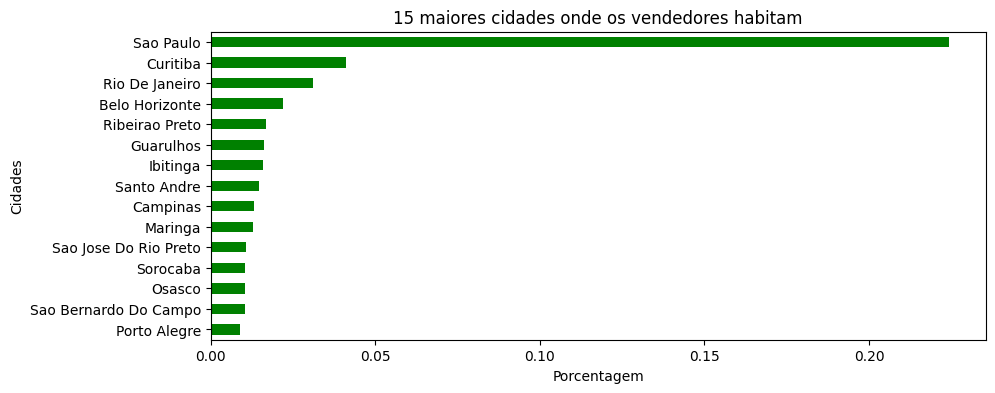

In [68]:
df_sellers.value_counts('seller_city', ascending=True, normalize=True).tail(15).\
plot(
    kind='barh', figsize=(10,4), xlabel='Porcentagem', ylabel='Cidades', color='green',
    title='15 maiores cidades onde os vendedores habitam'
    )